<a href="https://colab.research.google.com/github/HarryWallrus/Anaerobic_Digestion_model/blob/main/Anaerobic_digestion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize

In [2]:
!pip install scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import shap
from skopt import BayesSearchCV, gp_minimize
from skopt.space import Real, Integer
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
import joblib
import plotly.graph_objects as go

# Exploratory Data Analysis (EDA)
---

## Data Loading
---

In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
file_name = "Anaerobic_dataset.xlsx"  # Replace with your actual file name
df = pd.read_excel(file_name)

# Display the first few rows of the dataset
df.head()

Saving Anaerobic_dataset.xlsx to Anaerobic_dataset.xlsx


,Material Code,Material Name,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Material Source,Pretreatment,Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Reactor Type,Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
0,B001,Banana Peel,12.8,38.0,16.4,92.5,Food Waste,Mechanical,55,7.2,3.3,20,CSTR,0.30,63,56.3
1,B002,Orange Peel,17.9,21.3,21.6,90.7,Agricultural Waste,Thermal,35,6.7,3.7,22,UASB,0.24,52,50.2
2,B003,Orange Peel,24.5,39.5,13.7,90.1,Agricultural Waste,Mechanical,55,7.0,2.2,12,UASB,0.27,60,53.6
3,B004,Wheat Straw,9.5,35.1,18.8,83.4,Agricultural Waste,Mechanical,55,7.0,2.0,22,Batch,0.43,54,67.9
4,B005,Banana Peel,16.8,49.2,13.5,82.3,Agricultural Waste,Chemical,35,6.6,3.8,28,Batch,0.31,50,54.0


In [5]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Anaerobic_dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify
print(df.head())

  Material Code Material Name  Lignin (%)  Cellulose (%)  Hemicellulose (%)  \
0          B001   Banana Peel        12.8           38.0               16.4   
1          B002   Orange Peel        17.9           21.3               21.6   
2          B003   Orange Peel        24.5           39.5               13.7   
3          B004   Wheat Straw         9.5           35.1               18.8   
4          B005   Banana Peel        16.8           49.2               13.5   

   VS (%)     Material Source Pretreatment  Digestion Temperature (°C)  \
0    92.5          Food Waste   Mechanical                          55   
1    90.7  Agricultural Waste      Thermal                          35   
2    90.1  Agricultural Waste   Mechanical                          55   
3    83.4  Agricultural Waste   Mechanical                          55   
4    82.3  Agricultural Waste     Chemical                          35   

   Initial pH  OLR (kg VS/m³/day)  HRT (Days) Reactor Type  \
0         7.2     

Drop the first column of the dataset:

In [6]:
# Remove the first column of the dataset
df = df.iloc[:, 1:]

# Display the first few rows to confirm the column is removed
df.head()

,Material Name,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Material Source,Pretreatment,Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Reactor Type,Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
0,Banana Peel,12.8,38.0,16.4,92.5,Food Waste,Mechanical,55,7.2,3.3,20,CSTR,0.30,63,56.3
1,Orange Peel,17.9,21.3,21.6,90.7,Agricultural Waste,Thermal,35,6.7,3.7,22,UASB,0.24,52,50.2
2,Orange Peel,24.5,39.5,13.7,90.1,Agricultural Waste,Mechanical,55,7.0,2.2,12,UASB,0.27,60,53.6
3,Wheat Straw,9.5,35.1,18.8,83.4,Agricultural Waste,Mechanical,55,7.0,2.0,22,Batch,0.43,54,67.9
4,Banana Peel,16.8,49.2,13.5,82.3,Agricultural Waste,Chemical,35,6.6,3.8,28,Batch,0.31,50,54.0


## Check for Missing or Duplicate Data
---

Check for missing data and displaying the number of missing values for each column (if any).

In [7]:
# check if the data contains null values
df.isna().sum()

,0
Material Name,0
Lignin (%),0
Cellulose (%),0
Hemicellulose (%),0
VS (%),0
Material Source,0
Pretreatment,0
Digestion Temperature (°C),0
Initial pH,0
OLR (kg VS/m³/day),0


Dropping methane and energy efficiency columns, since the only output I care about is Biogas Yield:

In [8]:
df.drop("Methane (%)", axis=1, inplace=True)

# Check if the column has been deleted
if "Methane (%)" not in df.columns:
    print("Column 'Methane (%)' has been deleted successfully.")
else:
    print("Column 'Methane (%)' still exists.")


Column 'Methane (%)' has been deleted successfully.


In [9]:
df.drop("Energy Efficiency (%)", axis=1, inplace=True)

# Check if the column has been deleted
if "Energy Efficiency (%)" not in df.columns:
    print("Column 'Energy Efficiency (%)' has been deleted successfully.")
else:
    print("Column 'Energy Efficiency (%)' still exists.")


Column 'Energy Efficiency (%)' has been deleted successfully.


In [10]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 250
Number of columns: 13


In [11]:
# Print the first few rows of the DataFrame to verify
print(df.head())

  Material Name  Lignin (%)  Cellulose (%)  Hemicellulose (%)  VS (%)  \
0   Banana Peel        12.8           38.0               16.4    92.5   
1   Orange Peel        17.9           21.3               21.6    90.7   
2   Orange Peel        24.5           39.5               13.7    90.1   
3   Wheat Straw         9.5           35.1               18.8    83.4   
4   Banana Peel        16.8           49.2               13.5    82.3   

      Material Source Pretreatment  Digestion Temperature (°C)  Initial pH  \
0          Food Waste   Mechanical                          55         7.2   
1  Agricultural Waste      Thermal                          35         6.7   
2  Agricultural Waste   Mechanical                          55         7.0   
3  Agricultural Waste   Mechanical                          55         7.0   
4  Agricultural Waste     Chemical                          35         6.6   

   OLR (kg VS/m³/day)  HRT (Days) Reactor Type  Biogas Yield (m³/kg VS)  
0                 

Identify any duplicate rows in the data and drop them, if any:

In [12]:
# Check for duplicate rows before removal
num_duplicates_before = df.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)

# Remove duplicate rows
df = df.drop_duplicates()

# Check if duplicates were removed successfully
num_duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after removal:", num_duplicates_after)

# Print the final DataFrame
print(df)

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
    Material Name  Lignin (%)  Cellulose (%)  Hemicellulose (%)  VS (%)  \
0     Banana Peel        12.8           38.0               16.4    92.5   
1     Orange Peel        17.9           21.3               21.6    90.7   
2     Orange Peel        24.5           39.5               13.7    90.1   
3     Wheat Straw         9.5           35.1               18.8    83.4   
4     Banana Peel        16.8           49.2               13.5    82.3   
..            ...         ...            ...                ...     ...   
245    Tea Leaves        22.6           34.1               15.8    77.8   
246   Wheat Straw        16.6           34.2               21.0    85.8   
247   Potato Peel        17.8           38.8               10.1    91.7   
248   Wheat Straw        18.7           30.1               13.0    94.0   
249   Wheat Straw        24.1           37.0               25.2    88.3   

        Materi

In [13]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

Material Name                  object
Lignin (%)                    float64
Cellulose (%)                 float64
Hemicellulose (%)             float64
VS (%)                        float64
Material Source                object
Pretreatment                   object
Digestion Temperature (°C)      int64
Initial pH                    float64
OLR (kg VS/m³/day)            float64
HRT (Days)                      int64
Reactor Type                   object
Biogas Yield (m³/kg VS)       float64
dtype: object

Numeric columns: ['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)', 'VS (%)', 'Digestion Temperature (°C)', 'Initial pH', 'OLR (kg VS/m³/day)', 'HRT (Days)', 'Biogas Yield (m³/kg VS)']

Categorical columns: ['Material Name', 'Material Source', 'Pretreatment', 'Reactor Type']


## Summary Statistics
---



In [14]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

       Lignin (%)  Cellulose (%)  Hemicellulose (%)      VS (%)  \
count  250.000000     250.000000         250.000000  250.000000   
mean    15.367200      35.509600          20.372000   85.462800   
std      5.677692       8.390805           5.760008    5.694556   
min      5.000000      20.100000          10.000000   75.000000   
25%     10.625000      28.400000          15.600000   81.100000   
50%     15.500000      35.800000          20.250000   85.500000   
75%     19.975000      42.400000          25.500000   90.275000   
max     25.000000      49.900000          29.900000   94.900000   

       Digestion Temperature (°C)  Initial pH  OLR (kg VS/m³/day)  HRT (Days)  \
count                  250.000000  250.000000          250.000000   250.00000   
mean                    45.800000    7.002400            2.834000    20.38000   
std                      9.987945    0.306545            0.720054     6.01968   
min                     35.000000    6.500000            1.500000    10.

Apply one-hot encoding to convert the categorical variables into numerical format (one-hot makes encoded columns in a binary true/false manner).

In [16]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Biogas Yield (m³/kg VS),Material Name_Banana Peel,...,Material Source_Agricultural Waste,Material Source_Food Waste,Material Source_Industrial Waste,Pretreatment_Chemical,Pretreatment_Combined,Pretreatment_Mechanical,Pretreatment_Thermal,Reactor Type_Batch,Reactor Type_CSTR,Reactor Type_UASB
0,12.8,38.0,16.4,92.5,55,7.2,3.3,20,0.30,True,...,False,True,False,False,False,True,False,False,True,False
1,17.9,21.3,21.6,90.7,35,6.7,3.7,22,0.24,False,...,True,False,False,False,False,False,True,False,False,True
2,24.5,39.5,13.7,90.1,55,7.0,2.2,12,0.27,False,...,True,False,False,False,False,True,False,False,False,True
3,9.5,35.1,18.8,83.4,55,7.0,2.0,22,0.43,False,...,True,False,False,False,False,True,False,True,False,False
4,16.8,49.2,13.5,82.3,35,6.6,3.8,28,0.31,True,...,True,False,False,True,False,False,False,True,False,False


If checking for duplicate columns, use something like this:

In [17]:
# Assuming your data is in a DataFrame named 'df'
duplicate_columns = df.columns[df.columns.duplicated()]

# To view the duplicate columns
print(duplicate_columns)

Index([], dtype='object')


## Correlation and Heatmaps
---

Generate a correlation matrix and a heat map to examine correlations between numeric variables in the dataset.

In [18]:
# Split the Data into X (features) and y (targets):
# Assuming 'target_column' is the name of your target variable

X = df_encoded.drop('Biogas Yield (m³/kg VS)', axis=1)
y = df_encoded['Biogas Yield (m³/kg VS)']

# Display the first few rows of X and y
X.head(), y.head()

(   Lignin (%)  Cellulose (%)  Hemicellulose (%)  VS (%)  \
 0        12.8           38.0               16.4    92.5   
 1        17.9           21.3               21.6    90.7   
 2        24.5           39.5               13.7    90.1   
 3         9.5           35.1               18.8    83.4   
 4        16.8           49.2               13.5    82.3   
 
    Digestion Temperature (°C)  Initial pH  OLR (kg VS/m³/day)  HRT (Days)  \
 0                          55         7.2                 3.3          20   
 1                          35         6.7                 3.7          22   
 2                          55         7.0                 2.2          12   
 3                          55         7.0                 2.0          22   
 4                          35         6.6                 3.8          28   
 
    Material Name_Banana Peel  Material Name_Coffee Grounds  ...  \
 0                       True                         False  ...   
 1                      False   

In [19]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Material Name_Banana Peel', 'Material Name_Coffee Grounds', 'Material Name_Corn Stalk', 'Material Name_Orange Peel', 'Material Name_Potato Peel', 'Material Name_Rice Husk', 'Material Name_Sugarcane Bagasse', 'Material Name_Tea Leaves', 'Material Name_Wheat Straw', 'Material Name_Wood Chips', 'Material Source_Agricultural Waste', 'Material Source_Food Waste', 'Material Source_Industrial Waste', 'Pretreatment_Chemical', 'Pretreatment_Combined', 'Pretreatment_Mechanical', 'Pretreatment_Thermal', 'Reactor Type_Batch', 'Reactor Type_CSTR', 'Reactor Type_UASB']


In [20]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

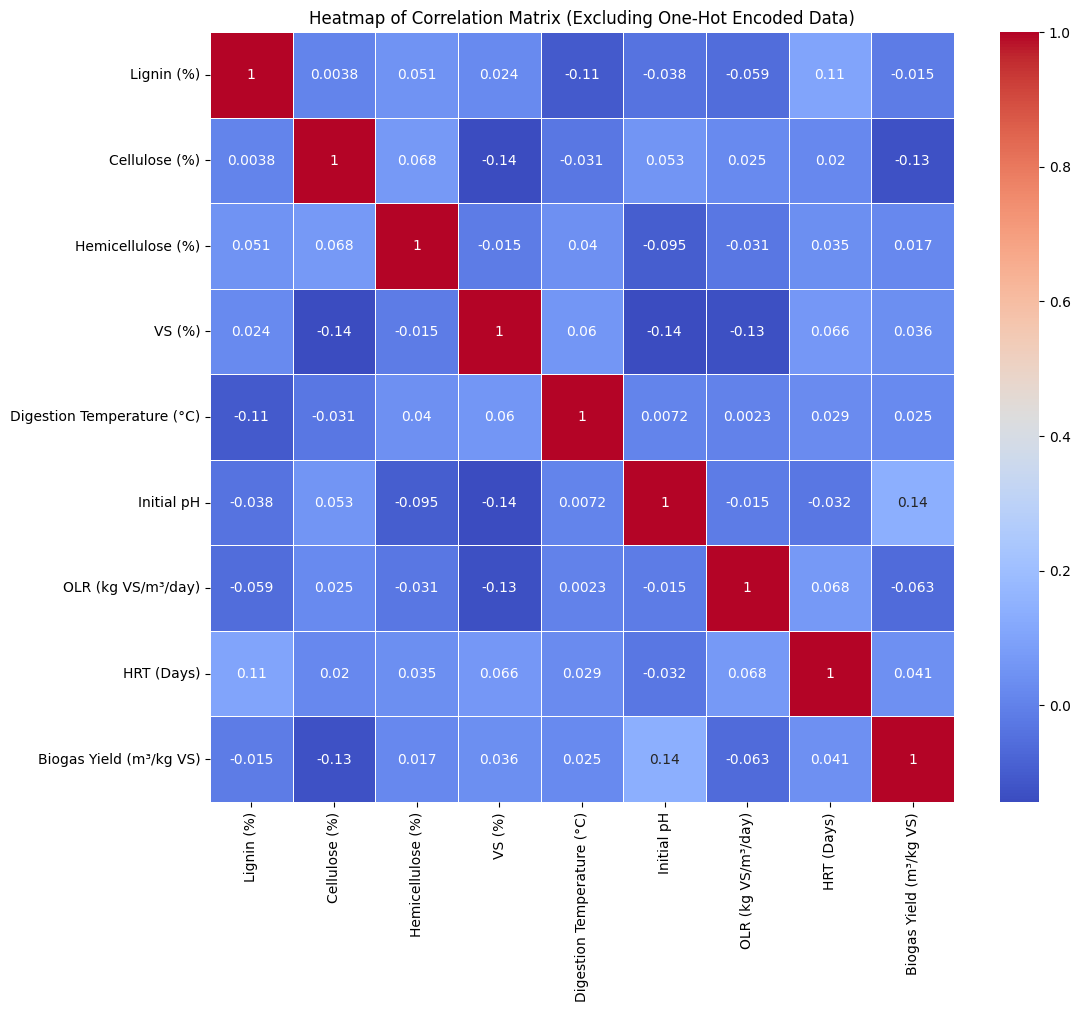

In [21]:
# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns
correlations = numerical_columns.corr()['Biogas Yield (m³/kg VS)']  # Computing the correlation matrix
print(correlations)

Lignin (%)                   -0.014887
Cellulose (%)                -0.129459
Hemicellulose (%)             0.017050
VS (%)                        0.035910
Digestion Temperature (°C)    0.024781
Initial pH                    0.138057
OLR (kg VS/m³/day)           -0.063432
HRT (Days)                    0.041085
Biogas Yield (m³/kg VS)       1.000000
Name: Biogas Yield (m³/kg VS), dtype: float64


## Visualizing Data Relationships
---

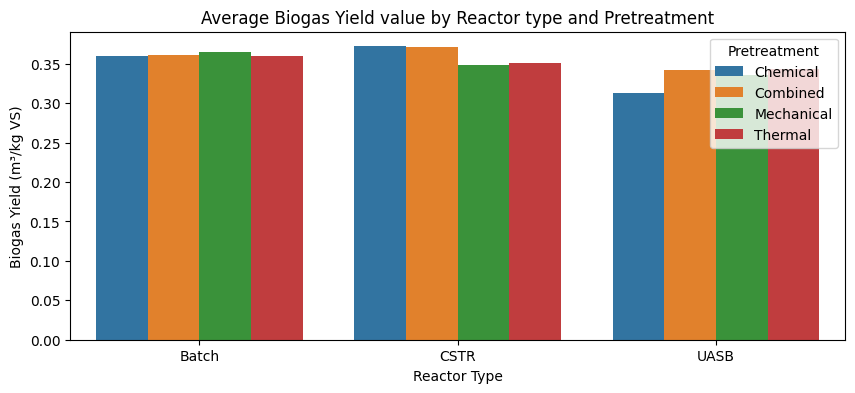

In [23]:
# Calculate the mean of the target variable for each combination of categories
df_grouped = df.groupby(['Reactor Type', 'Pretreatment'])['Biogas Yield (m³/kg VS)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Reactor Type', y='Biogas Yield (m³/kg VS)', hue='Pretreatment', data=df_grouped)
plt.title('Average Biogas Yield value by Reactor type and Pretreatment')
plt.show()

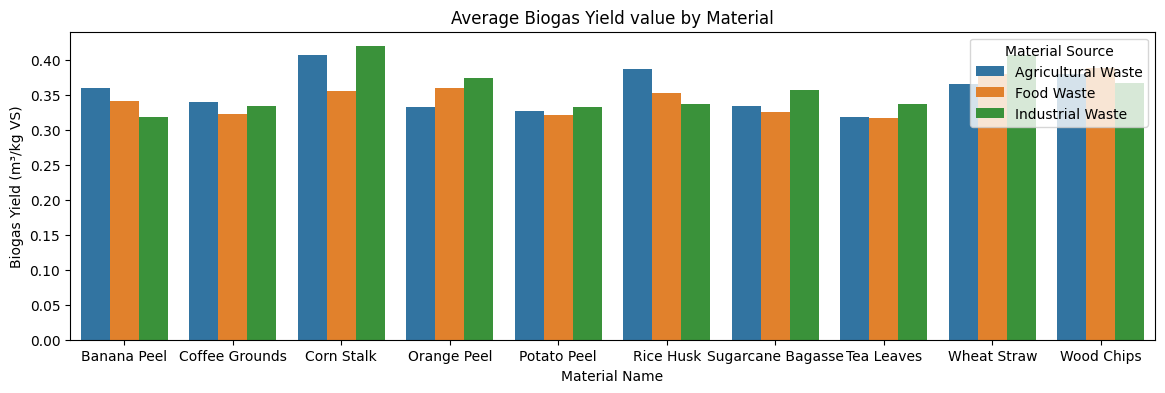

In [24]:
# Calculate the mean of the target variable for each combination of categories
df_grouped = df.groupby(['Material Name', 'Material Source'])['Biogas Yield (m³/kg VS)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 4))
sns.barplot(x='Material Name', y='Biogas Yield (m³/kg VS)', hue='Material Source', data=df_grouped)
plt.title('Average Biogas Yield value by Material')
plt.show()

# Machine Learning
---

## Linear Regression

Split the data into training and test sets (for validation of the created model):

In [25]:
from sklearn.model_selection import train_test_split

X = df[['Initial pH']]
y = df['Biogas Yield (m³/kg VS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Import the library needed to perform the linear regression:

In [26]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Print the parameters of the linear regression:

In [27]:
print('β1 = ' + str(linear_regression.coef_) + ', β0 = ' + str(linear_regression.intercept_))

β1 = [0.03590616], β0 = 0.10256456745356335


Use the $
R^2$ parameter to quantify how good the adjustment was:

In [28]:
from sklearn.metrics import r2_score
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

print('R2 train = ', r2_score(y_train, y_pred_train))
print('R2 test = ', r2_score(y_test, y_pred_test))


R2 train =  0.017000164058637912
R2 test =  0.0002965011331050871


Plot the predicted value against the actual value to visualize how good the adjustment was:

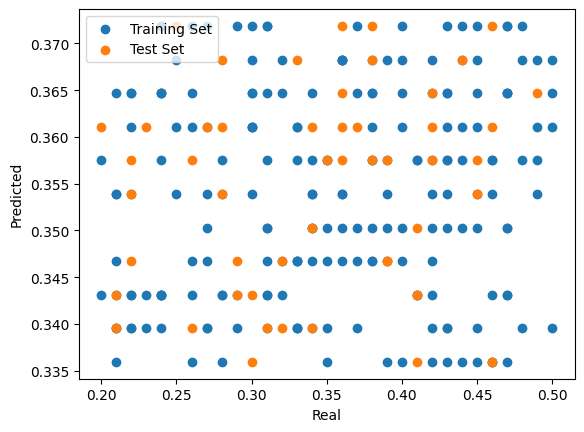

In [29]:
plt.scatter(y_train,y_pred_train, label='Training Set')
plt.scatter(y_test,y_pred_test, label='Test Set')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()


## Multiple Linear Regression

---



Multiple linear regression (MLR) is a generalization of classical linear regression. MLR models a linear relationship between the target response and multiple explanatory variables.

$y_i =β_0​	 +β_1	 x_{i1}​	 + β_2 x_{i2}​	 +...+ β_p​	 x_{ip}​
$

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type', 'Biogas Yield (m³/kg VS)'], axis=1)
y = df['Biogas Yield (m³/kg VS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Since MLR is a generalization, the **Scikit Learn** library uses the same function that we used before:

In [31]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Increasing the number of predictor variables leads to a better adjustment of the target so that the value of $R^2$ increases:

In [32]:
from sklearn.metrics import r2_score

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

print('R2 training = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

R2 training =  0.055086826975586534
R2 test =  -0.05728317373224945


The advantage of an RSME test is that it can be used for non-linear models:

In [33]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print('RSME test= ', rmse_test)

RSME test=  0.08017234582485963


Again, we can use a graph to compare the training and test set.

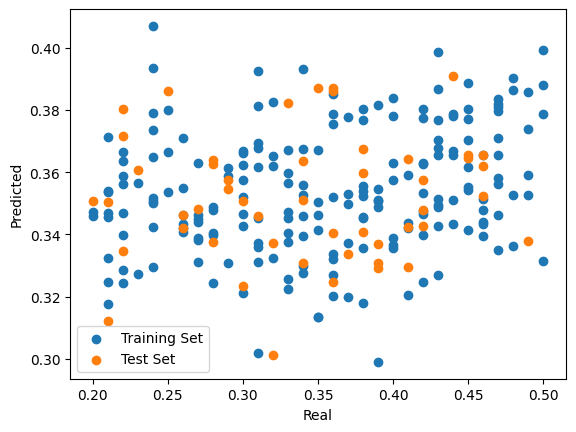

In [34]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Analyze the coefficients of the MLR. (pay attention to their magnitude)

In [35]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                            Coefficients
Lignin (%)                     -0.000513
Cellulose (%)                  -0.001601
Hemicellulose (%)               0.000419
VS (%)                         -0.000112
Digestion Temperature (°C)      0.000651
Initial pH                      0.037207
OLR (kg VS/m³/day)             -0.008424
HRT (Days)                      0.000490


<Axes: >

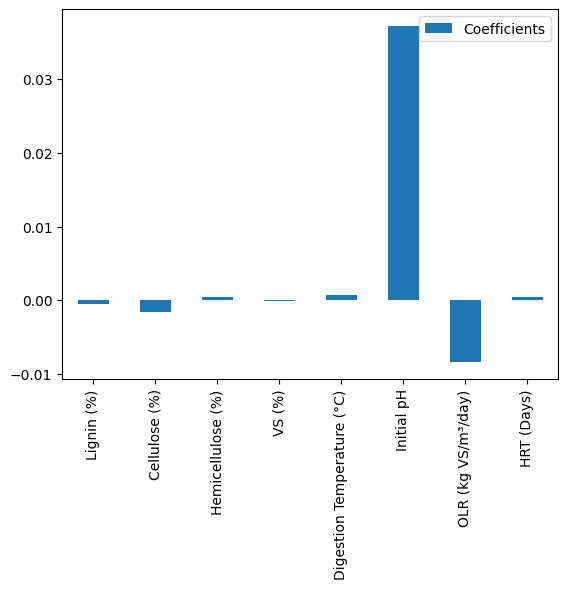

In [36]:
coefficients.plot.bar()

# Standardization
---
The standardization is a method to transform the different predictor variables into comparable ranges. Using standardized data, a higher coefficient indicates that it is a predictor variable that has more importance to predict the target.

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type', 'Biogas Yield (m³/kg VS)'], axis=1)
y = df['Biogas Yield (m³/kg VS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize after splitting the dataset (to avoid bias):

In [38]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multiple_linear_regression.predict(X_test)

rmse_MLR = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print('R2 test = ', r2)
print('RSME test = ', rmse_MLR)

R2 test =  -0.05728317373224834
RSME test =  0.08017234582485959


As the data is standardized, we can analyze the coefficients and determine which are the most important predictor variables.

In [41]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                            Coefficients
Lignin (%)                     -0.002947
Cellulose (%)                  -0.013583
Hemicellulose (%)               0.002344
VS (%)                         -0.000644
Digestion Temperature (°C)      0.006452
Initial pH                      0.011443
OLR (kg VS/m³/day)             -0.006032
HRT (Days)                      0.002990


If some variables are seen to be less important to generate the regression model, then it may be better to exclude them or they may introduce noise into the model.

<Axes: >

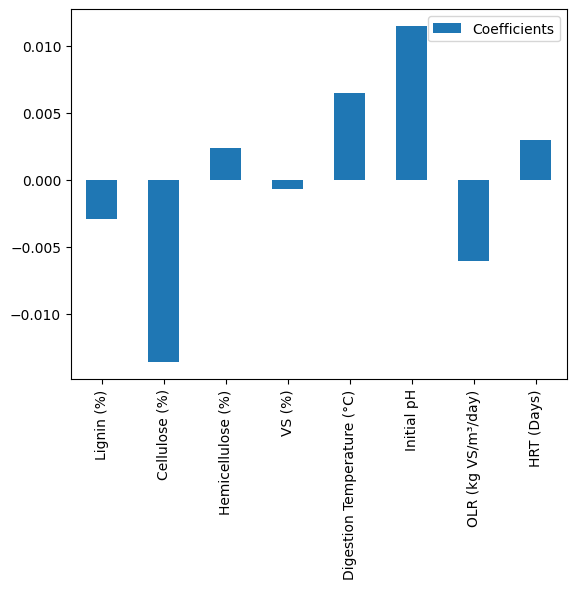

In [42]:
coefficients.plot.bar()

# LASSO
---
Least Absolute Shrinkage and Selection Operator (LASSO) is a linear regression method that produces variable selection and regularization to improve the prediction accuracy and generate a smaller model. This method uses a cost function with a constant alpha that defines the degree of penalization.

$
LASSO_{CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p |w_j| \\
For \; some \; t \, > \, 0, \, \sum_{j=0}^p |w_j|<t
$

**Scikit learn** has implemented LASSO in the function **sklearn.linear_model.Lasso**.

In [43]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.0001)
lasso_regression.fit(X = X_train, y = y_train)

Lasso(alpha=0.0001)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_regression.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R2 test = ', r2)

R2 test =  -0.055604614402959385


Let's analyze if using LASSO we have a smaller model where some of the coefficients are zero.

In [45]:
coeffecients = pd.DataFrame(lasso_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                            Coeffecient
Lignin (%)                    -0.002824
Cellulose (%)                 -0.013438
Hemicellulose (%)              0.002219
VS (%)                        -0.000508
Digestion Temperature (°C)     0.006368
Initial pH                     0.011353
OLR (kg VS/m³/day)            -0.005908
HRT (Days)                     0.002871


<Axes: >

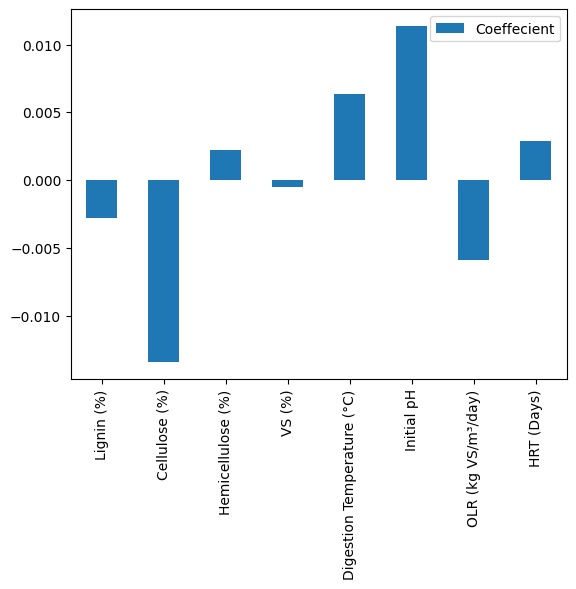

In [46]:
coeffecients.plot.bar()

## Comparing Various ML Modes
---
Comparing various models is a crucial step in the process of building machine learning systems.
Comparing various models is essential for making informed decisions about the selection and deployment of machine learning models. It helps in understanding their strengths and weaknesses, guiding further optimization efforts, and ensuring that the chosen model aligns with the goals and constraints of the specific task at hand.

 Various machine learning models were compared using just the numerical columns

In [47]:
X = df.drop('Biogas Yield (m³/kg VS)',axis=1)
Y = df['Biogas Yield (m³/kg VS)']
# Select only numerical columns (excluding 'object' type)
X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


SGD Mean Squared Error: 156101764514229328334028800.000, R² Score: -25010180565233025151817220096.000, MAE: 12287219788334.348
 
Random Forest Mean Squared Error: 0.007, R² Score: -0.166, MAE: 0.073
 
Gradient Boosting Mean Squared Error: 0.008, R² Score: -0.265, MAE: 0.074
 
AdaBoost Mean Squared Error: 0.007, R² Score: -0.122, MAE: 0.070
 
Decision Tree Mean Squared Error: 0.013, R² Score: -1.082, MAE: 0.095
 
SVR Mean Squared Error: 0.007, R² Score: -0.065, MAE: 0.070
 
Linear Regression Mean Squared Error: 0.007, R² Score: -0.052, MAE: 0.070
 
Extra Trees Mean Squared Error: 0.007, R² Score: -0.153, MAE: 0.071
 


Effects of scaling the data were also investigated:

In [48]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train with scaled data
    y_pred = model.predict(X_test_scaled)  # Predict with scaled test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


SGD Mean Squared Error: 0.007, R² Score: -0.069, MAE: 0.071
 
Random Forest Mean Squared Error: 0.008, R² Score: -0.208, MAE: 0.074
 
Gradient Boosting Mean Squared Error: 0.008, R² Score: -0.285, MAE: 0.075
 
AdaBoost Mean Squared Error: 0.007, R² Score: -0.157, MAE: 0.074
 
Decision Tree Mean Squared Error: 0.012, R² Score: -0.963, MAE: 0.093
 
MLP Mean Squared Error: 0.018, R² Score: -1.909, MAE: 0.108
 
SVR Mean Squared Error: 0.007, R² Score: -0.117, MAE: 0.070
 
XGBoost Mean Squared Error: 0.008, R² Score: -0.258, MAE: 0.074
 
Linear Regression Mean Squared Error: 0.007, R² Score: -0.052, MAE: 0.070
 
Extra Trees Mean Squared Error: 0.007, R² Score: -0.169, MAE: 0.073
 


#### Comparing the various ML models using both the numerical and categorical columns.
The categorical are transformed using onehot encoding (pd.get_dummies())

In [49]:
# Apply one-hot encoding to specific columns
encoded_df = pd.get_dummies(df, columns=['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type'])
x = encoded_df.drop('Biogas Yield (m³/kg VS)',axis=1)
y = encoded_df['Biogas Yield (m³/kg VS)']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train with scaled data
    y_pred = model.predict(X_test)  # Predict with scaled test data
    r2 = r2_score(y_test, y_pred)
    if r2 > 0.90:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

## Cross validation
---
 Is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem. The overall aim of Cross-Validation is to use it as a tool to evaluate machine learning models, by training a number of models on different subsets of the input data.

Cross-validation can be used to detect overfitting in a model which infers that the model is not effectively generalizing patterns and similarities in the new inputted data.



#### A typical Cross-Validation workflow:


In order to perform cross-validation, the following steps are typically taken:

+ Split the dataset into training data and test data
+ The parameters will undergo a Cross-Validation test to see which are the best parameters to select.
+ These parameters will then be implemented into the model for retraining
+ Final evaluation will occur and this will depend if the cycle has to go again, depending on the accuracy and the level of generalization that the model performs.

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

 # Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Cross-validation for each model
selected_models = []
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=10, scoring='r2')  # Perform 5-fold cross-validation
    mean_r2 = cv_scores.mean()
    if mean_r2 > 0.1:
        print(cv_scores,model)
        model.fit(X_train, y_train)  # Train the model on the entire training set
        y_pred = model.predict(X_test)  # Predict on the test set
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} Mean R² Score: {mean_r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

### Feature Selection and Transformation
---
Feature selection is a critical process in machine learning and data analysis that involves choosing a subset of relevant features (variables or columns) from the original dataset. The objective of feature selection is to select the most informative and significant features while excluding redundant, irrelevant, or noisy ones. This process improves model performance, reduces overfitting, and enhances interpretability.

#### When not to use pd.get_dummies()
+ The get_dummies function does not account for unseen data
Therefore, the dummy variables generated with the testing data must match the dummy variables generated with the training data. With this in mind, it is easy to see how using Pandas for one hot encoding can cause problems



In [51]:
# Split the dataset into training and testing sets
X = df.drop('Biogas Yield (m³/kg VS)',axis=1)
Y = df['Biogas Yield (m³/kg VS)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = ['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type']  # Replace 'Location' with your categorical column name
encoder = OneHotEncoder()

# Feature transformation function for log, square root, and polynomial features
log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
     ('log_sqrt',log_sqrt_transformer,numerical_features),
       ('poly_trans',polynomial_transformer,numerical_features),
        ('cat', encoder, categorical_features)
    ]
)
# Initialize models
models = {
   'SGD': SGDRegressor(),
  'Random Forest': RandomForestRegressor(),
   'Gradient Boosting': GradientBoostingRegressor(),
   'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
   'Extra Trees': ExtraTreesRegressor()
}


# Train and evaluate each model
for name, model in models.items():
    # Use Pipeline to chain preprocessing and modeling steps
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)  # Train the model

    # No need to separately encode X_test, the pipeline handles it
    r2 = model_pipeline.score(X_test, y_test)  # R² Score
    if r2 > 0.95:
        y_pred = model_pipeline.predict(X_test)  # Predict
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")



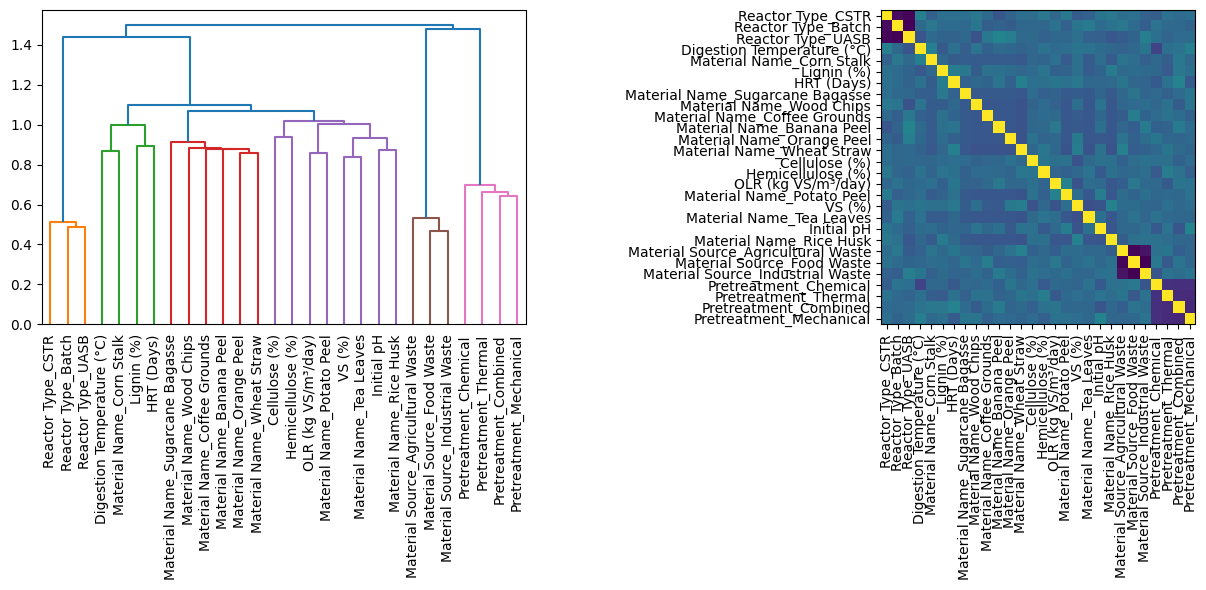

In [52]:
def plot_correlation(data,target_column='Biogas Yield (m³/kg VS)'):

  df = pd.get_dummies(data, columns=['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type'])
  x = df.drop('Biogas Yield (m³/kg VS)', axis=1)
  cols = x.columns
  """
  Function that shows the correlation and clustering between the features:

  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
  corr = spearmanr(x).correlation

  # Ensure the correlation matrix is symmetric
  corr = (corr + corr.T) / 2
  np.fill_diagonal(corr, 1)
  # We convert the correlation matrix to a distance matrix before performing
  # hierarchical clustering using Ward's linkage.
  distance_matrix = 1 - np.abs(corr)
  dist_linkage = hierarchy.ward(squareform(distance_matrix))
  dendro = hierarchy.dendrogram(
      dist_linkage, labels=cols, ax=ax1, leaf_rotation=90
  )
  dendro_idx = np.arange(0, len(dendro["ivl"]))

  ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
  ax2.set_xticks(dendro_idx)
  ax2.set_yticks(dendro_idx)
  ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
  ax2.set_yticklabels(dendro["ivl"])
  fig.tight_layout()
  plt.show()

plot_correlation(df)

In [53]:
# feature selection
X = df.drop('Biogas Yield (m³/kg VS)', axis=1)

cols_ = [
    'Material Name',	'Lignin (%)',	'Cellulose (%)',	'Hemicellulose (%)',
    'VS (%)',	'Material Source',	'Pretreatment',	'Digestion Temperature (°C)',
    'Initial pH',	'OLR (kg VS/m³/day)',	'HRT (Days)',	'Reactor Type'
]


Y = df['Biogas Yield (m³/kg VS)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = ['Material Source', 'Material Name', 'Pretreatment', 'Reactor Type']  # Replace 'Location' with your categorical column name
encoder = OneHotEncoder()

# Feature transformation function for log and polynomial features
log_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),
        ('log', log_transformer, numerical_features),  # Apply log transform to numerical columns
        ('poly', polynomial_transformer, numerical_features)  # Apply polynomial features to numerical columns
    ]
)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    # Use Pipeline to chain preprocessing and modeling steps
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)  # Train the model

    # No need to separately encode X_test, the pipeline handles it
    r2 = model_pipeline.score(X_test, y_test)  # R² Score
    if r2 > 0.95:
        y_pred = model_pipeline.predict(X_test)  # Predict
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        selected_models.append((name, model))

## Stacked model
---
Stacking models, also known as stacked generalization, is a technique used to combine multiple machine learning models to improve overall predictive performance.

+ Combine multiple models to improve overall predictive performance.
+ Useful when individual models possess different strengths and weaknesses.
+ Aims to reduce overfitting by amalgamating diverse predictions.
+ Helpful for handling heterogeneous datasets with varied feature types.
+ Optimizes performance by offering consistency across different data subsets.
+ Helps reduce the impact of outliers and enhances robustness in predictions.

The combination of tow or more models can imporve the overall performance of a model

In [54]:
# Define your columns for different types of features
numerical_features = ['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)',
                      'VS (%)', 'Digestion Temperature (°C)', 'Initial pH',
                      'OLR (kg VS/m³/day)', 'HRT (Days)',
                      'Biogas Yield (m³/kg VS)']
categorical_features = ['Material Source', 'Material Name', 'Pretreatment',
                        'Reactor Type']

# Split the dataset into training and testing sets
X = df[numerical_features + categorical_features]
y = df['Biogas Yield (m³/kg VS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing for numerical and categorical features
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Feature transformation function for log, square root, and polynomial features
log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Combine preprocessed numerical and categorical features
preprocessor = ColumnTransformer([
 ('log_sqrt',log_sqrt_transformer,numerical_features),
 ('poly_trans',polynomial_transformer,numerical_features),
 ('cat', categorical_pipeline, categorical_features),
])

# Models
model1 = LinearRegression()
model2 = XGBRegressor()
model3 = GradientBoostingRegressor()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('lr', model1),
        ('xgb', model2),
        ('gb', model3),
    ],
    final_estimator=GradientBoostingRegressor()# ExtraTreesRegressor() # Meta-model used to combine the base estimators' predictions
)
model_steps = [

        ('preprocessor',preprocessor),
        ('model', stacking_model)
    ]

# Construct the pipeline
model_pipeline = Pipeline(steps=model_steps)

# Train and evaluate the model
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model_pipeline.score(X_test, y_test)
print(f"R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### Save the best model

In [55]:
###
joblib.dump(model_pipeline,"best_model.joblib")
# Production environment
best_model = joblib.load('best_model.joblib')
best_model.predict(X_train.iloc[:6])

NotFittedError: Pipeline is not fitted yet.

### Helper functions to be used

Helper functions offer benefits in code organization, readability, testing, collaboration, and overall productivity when working with machine learning models.

In [ ]:
def plot_feature_importance(data, target_column, model):
    encoded_df = pd.get_dummies(data, columns=['Location'])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Feature Importance plot
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()

    fig = go.Figure(go.Bar(
        x=feature_importance[sorted_idx],
        y=x.columns[sorted_idx],
        orientation='h'
    ))
    fig.update_layout(title="Extra Trees Regressor - Feature Importance")
    fig.update_layout(height=600, width=1000, title_text="Feature Importance and SHAP Summary")
    fig.show()

def plot_shap(data, target_column, model):
    encoded_df = pd.get_dummies(data, columns=['Location'])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # SHAP summary plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train,
                    plot_size= (10,7))



def plot_local_shap(data, target_column, model,id):
   # from shap import Explainer, Explanation
   # from shap import waterfall_plot

    encoded_df = pd.get_dummies(data, columns=['Location'])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Fits the explainer
    explainer = shap.Explainer(model)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    #shap_values = explainer.shap_values(X_train)
    shap.plots.waterfall(shap_values[id])

def plot_scatter(y_train, pred_train, y_test, pred_test):
    # pred_train_ = model.predict(X_train)
    #pred_test = model.predict(X_test)
    # Data for the scatter plot
    trace1 = go.Scatter(x=y_train, y=pred_train, mode='markers', name='Training Set',
                        marker=dict(color='blue', size=8))
    trace2 = go.Scatter(x=y_test, y=pred_test, mode='markers', name='Test Set',
                        marker=dict(color='orange', size=8))

    # Plot layout
    layout = go.Layout(
        xaxis=dict(title='Real'),
        yaxis=dict(title='Predicted'),
        legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)')
    )
     # Create the figure and plot
       # Create the figure and plot
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.update_layout(plot_bgcolor="#FFFFFF",width=1000,height=600,showlegend=True,  title={
            'text': 'Scatter Plot for Predicted and Actual ',
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },)
    fig.show()

def train_models(data, target_column='Biogas Yield (m³/kg VS)'):
    # Split the dataset into training and testing sets
    cols_ = [
        'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)',
        'Plant capacity (kg/hr)', 'Location'
    ]

    X = data.drop(target_column, axis=1)
    Y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X[cols_], Y, test_size=0.20, random_state=42)

    # Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
    numerical_features = X_train.select_dtypes(exclude=['object']).columns
    categorical_features = ['Location']  # Replace 'Location' with your categorical column name

    encoder = OneHotEncoder()

    # Feature transformation function for log and polynomial features
    log_transformer = FunctionTransformer(np.log1p, validate=True)
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

    # Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', encoder, categorical_features),
            ('log', log_transformer, numerical_features),  # Apply log transform to numerical columns
            ('poly', polynomial_transformer, numerical_features)  # Apply polynomial features to numerical columns
        ]
    )

    # Initialize models
    models = {
        'SGD': SGDRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'MLP': MLPRegressor(),
        'SVR': SVR(),
        'XGBoost': XGBRegressor(),
        'Linear Regression': LinearRegression(),
        'Extra Trees': ExtraTreesRegressor()
    }

    # Train and evaluate each model
    selected_models = []
    for name, model in models.items():
        # Use Pipeline to chain preprocessing and modeling steps
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        model_pipeline.fit(X_train, y_train)  # Train the model

        # No need to separately encode X_test, the pipeline handles it
        r2 = model_pipeline.score(X_test, y_test)  # R² Score
        if r2 > 0.95:
            y_pred = model_pipeline.predict(X_test)  # Predict
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
            print(' ')
            selected_models.append((name, model))

    return

def train_evaluate_stacking_model(data):
    # Define your columns for different types of features
    numerical_features = ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)', 'Plant capacity (kg/hr)'] # after feature engineering
    categorical_features = ['Location']

    # Split the dataset into training and testing sets
    X = data[numerical_features + categorical_features]
    y = data['Biogas Yield (m³/kg VS)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing for numerical and categorical features
    categorical_pipeline = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

    # Feature transformation function for log, square root, and polynomial features
    log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

    # Combine preprocessed numerical and categorical features
    preprocessor = ColumnTransformer([
        ('log_sqrt', log_sqrt_transformer, numerical_features),
        ('poly_trans', polynomial_transformer, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

    # Models
    model1 = LinearRegression()
    model2 = ExtraTreesRegressor()
    model3 = GradientBoostingRegressor()

    # Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[
            ('lr', model1),
            ('rf', model2),
            ('gb', model3)
        ],
        final_estimator=ExtraTreesRegressor()  # Meta-model used to combine the base estimators' predictions
    )

    model_steps = [
        ('preprocessor', preprocessor),
        ('model', stacking_model)
    ]

    # Construct the pipeline
    model_pipeline = Pipeline(steps=model_steps)

    # Train and evaluate the model
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model_pipeline.score(X_test, y_test)
    print(f"R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")


#train_models(data)

#plot_feature_importance(data, 'MSP', model)

## How to use the helper functions

In [ ]:
# Example usage with your dataset
train_evaluate_stacking_model(df)

In [ ]:
# plot feature importance for a GBR model
model = GradientBoostingRegressor()
plot_feature_importance(df,'Biogas Yield (m³/kg VS)',model)

### Interpretability:
---
Understanding Models: Interpretability in machine learning refers to the ability to understand and explain how a model arrives at its predictions. It's crucial, especially when decisions made by models impact individuals or organizations. This is essential in critical applications such as healthcare, finance, and law, where clear reasoning behind a model's decision is crucial.

#### SHAP (SHapley Additive exPlanations):

+ Individual Feature Impact: SHAP is a method for explaining individual predictions by measuring the contribution of each feature to the prediction. It quantifies the impact of each feature on the model's output.

+ Model Agnostic: It works with any machine learning model and provides insights into each feature's importance, allowing a more comprehensive understanding of model behavior.

+ Global and Local Interpretations: SHAP offers both local interpretability (explaining a single prediction) and global interpretability (understanding the model's overall behavior).

##### Global interpretability

Effectively, SHAP can show us both the global contribution by using the feature importances, and the local feature contribution for each instance of the problem.

For example, the Location_China variable have a high negative contribution on the prediction, while low values have a high positive contribution.

The plant capacity variable has a really high positive contribution when its values are high, and a low negative contribution on low values. The feature S, Location_US has almost no contribution to the prediction, whether its values are high or low.

All variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.



In [ ]:
# define model to use
model = GradientBoostingRegressor()
plot_shap(df,'Biogas Yield (m³/kg VS)',model)

##### Local interpretabilty
Using SHAP for local interpretability can provide valuable insights into how a model is making predictions for specific instances, helping to build trust and understanding in machine learning models. The plot below shows how the prediction for the third data point in the dataset was done.

In the waterfall below, the x-axis has the values of the target (dependent) variable which is MSP. x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))).

The SHAP value for each feature in this observation is given by the length of the bar. In the example above, plant capacity has a SHAP value of -0.15, Location_China has a SHAP of +0.1 and so on. The sum of all SHAP values will be equal to E[f(x)] — f(x).

The absolute SHAP value shows us how much a single feature affected the prediction, so plant capacity contributed the most, Location_China and UK the second one,N and Ash  the third.

Note that these SHAP values are valid for this observation only. With other data points the SHAP values will change. In order to understand the importance or contribution of the features for the whole dataset, take a look at the global interpretability section

In [ ]:
plot_local_shap(data,'Biogas Yield (m³/kg VS)', model,3)